## Matplotlib PLOT

Tutorial used:
<br>
https://www.youtube.com/watch?v=UO98lJQ3QGI&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/marijuana_arrests_and_citations_2017_thru_2022.csv")

In [3]:
df.head()

,index,_id,PK,CCR,AGE,GENDER,RACE,TIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,record_type,marijuana_flag
0,3851,3852,1979466,16207605,54.0,M,B,2017-01-05T00:02:00,"5th AV & Pride ST Pittsburgh, PA 15219",4910 Tampering with or Fabricating Physical Ev...,"2000 Block Wyandotte ST Pittsburgh, PA 15219",Crawford-Roberts,Zone 2,305.0,6.0,3.0,-79.977467,40.438224,Arrest,1
1,3927,3928,1979566,16235765,23.0,F,B,2017-01-09T17:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children. / ...,"2000 Block 5th AV Pittsburgh, PA 15219",Bluff,Zone 2,103.0,6.0,3.0,-79.977530,40.438003,Arrest,1
2,4114,4115,1979812,16236311,15.0,M,B,2017-01-06T13:20:00,Zone 2,5503 Disorderly Conduct. / 13(a)(31) Marijuana...,Zone 5,NaN,Zone 5,NaN,NaN,NaN,NaN,NaN,Arrest,1
3,4189,4190,1979900,17000760,34.0,M,W,2017-01-02T09:12:00,"10 Block 40th ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,"10 Block 40th ST Pittsburgh, PA 15201",Central Lawrenceville,Zone 2,901.0,7.0,2.0,-79.964880,40.470229,Arrest,1
4,4208,4209,1979939,17001618,20.0,M,B,2017-01-03T15:40:00,"44th ST & Calvin ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,"44th ST & Calvin ST Pittsburgh, PA 15201",Central Lawrenceville,Zone 2,902.0,7.0,2.0,-79.953776,40.466623,Arrest,1


In [4]:
df['marijuana_flag'].value_counts()

1    12612
Name: marijuana_flag, dtype: int64

In [5]:
df['record_type'].value_counts()

Arrest      11444
Citation     1168
Name: record_type, dtype: int64

In [6]:
df['PK'].isna().sum()

0

In [7]:
df_by_race = df.groupby('RACE').\
    aggregate(rec_cnt=('PK', 'count')).\
    reset_index().\
    copy()

In [8]:
df_by_race

,RACE,rec_cnt
0,A,22
1,B,8037
2,H,82
3,I,5
4,O,95
5,U,48
6,W,4322


In [9]:
df['AGE'].value_counts()

26.0    530
27.0    515
30.0    489
23.0    477
28.0    462
       ... 
74.0      2
78.0      2
98.0      1
11.0      1
76.0      1
Name: AGE, Length: 68, dtype: int64

In [10]:
df.AGE.describe()

count    12573.000000
mean        32.848564
std         11.943537
min          0.000000
25%         24.000000
50%         30.000000
75%         40.000000
max         98.000000
Name: AGE, dtype: float64

In [11]:
df_by_zone = df.groupby('INCIDENTZONE').\
    aggregate(rec_cnt=('PK', 'count')).\
    reset_index().\
    copy()

In [12]:
df_by_zone

,INCIDENTZONE,rec_cnt
0,OSC,145
1,Zone 1,3071
2,Zone 2,1721
3,Zone 3,2222
4,Zone 4,1102
5,Zone 5,3357
6,Zone 6,984


In [13]:
df_by_age = df.groupby('AGE').\
    aggregate(rec_cnt=('PK', 'count')).\
    reset_index().\
    copy()

In [14]:
df_by_age

,AGE,rec_cnt
0,0.0,3
1,11.0,1
2,12.0,15
3,13.0,25
4,14.0,55
...,...,...
63,73.0,6
64,74.0,2
65,76.0,1
66,78.0,2


In [15]:
df_arrests_by_age = df.loc[df['record_type'] == 'Arrest'].\
    groupby('AGE').\
    aggregate(rec_cnt=('PK', 'count')).\
    reset_index().\
    copy()

In [16]:
df_citations_by_age = df.loc[df['record_type'] == 'Citation'].\
    groupby('AGE').\
    aggregate(rec_cnt=('PK', 'count')).\
    reset_index().\
    copy()

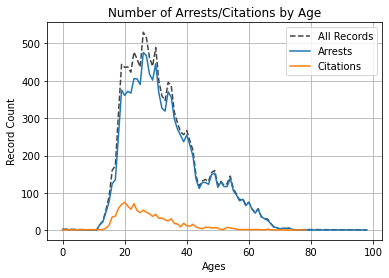

In [17]:
ages_x = df_by_age['AGE']
records_y = df_by_age['rec_cnt']
plt.plot(ages_x, records_y, color='#444444', linestyle='--', label='All Records')

ages_arrests_x = df_arrests_by_age['AGE']
records_arrests_y = df_arrests_by_age['rec_cnt']
plt.plot(ages_arrests_x, records_arrests_y, label='Arrests')

ages_citations_x = df_citations_by_age['AGE']
records_citations_y = df_citations_by_age['rec_cnt']
plt.plot(ages_citations_x, records_citations_y, label='Citations')

plt.xlabel("Ages")
plt.ylabel("Record Count")
plt.title("Number of Arrests/Citations by Age")

plt.legend()
plt.grid()
plt.show()

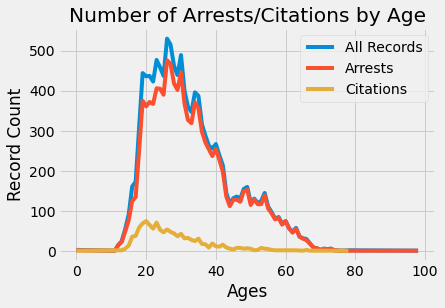

In [18]:
plt.style.use('fivethirtyeight')

ages_x = df_by_age['AGE']
records_y = df_by_age['rec_cnt']
plt.plot(ages_x, records_y, label='All Records')

ages_arrests_x = df_arrests_by_age['AGE']
records_arrests_y = df_arrests_by_age['rec_cnt']
plt.plot(ages_arrests_x, records_arrests_y, label='Arrests')

ages_citations_x = df_citations_by_age['AGE']
records_citations_y = df_citations_by_age['rec_cnt']
plt.plot(ages_citations_x, records_citations_y, label='Citations')

plt.xlabel("Ages")
plt.ylabel("Record Count")
plt.title("Number of Arrests/Citations by Age")

plt.legend()
plt.show()

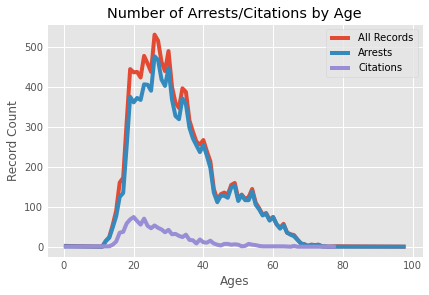

In [19]:
plt.style.use('ggplot')

ages_x = df_by_age['AGE']
records_y = df_by_age['rec_cnt']
plt.plot(ages_x, records_y, label='All Records')

ages_arrests_x = df_arrests_by_age['AGE']
records_arrests_y = df_arrests_by_age['rec_cnt']
plt.plot(ages_arrests_x, records_arrests_y, label='Arrests')

ages_citations_x = df_citations_by_age['AGE']
records_citations_y = df_citations_by_age['rec_cnt']
plt.plot(ages_citations_x, records_citations_y, label='Citations')

plt.xlabel("Ages")
plt.ylabel("Record Count")
plt.title("Number of Arrests/Citations by Age")

plt.legend()
plt.show()

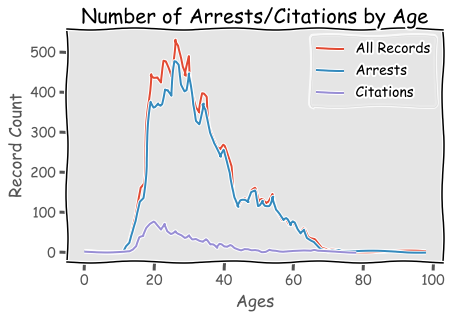

In [20]:
plt.xkcd()

ages_x = df_by_age['AGE']
records_y = df_by_age['rec_cnt']
plt.plot(ages_x, records_y, label='All Records')

ages_arrests_x = df_arrests_by_age['AGE']
records_arrests_y = df_arrests_by_age['rec_cnt']
plt.plot(ages_arrests_x, records_arrests_y, label='Arrests')

ages_citations_x = df_citations_by_age['AGE']
records_citations_y = df_citations_by_age['rec_cnt']
plt.plot(ages_citations_x, records_citations_y, label='Citations')

plt.xlabel("Ages")
plt.ylabel("Record Count")
plt.title("Number of Arrests/Citations by Age")

plt.legend()
plt.show()

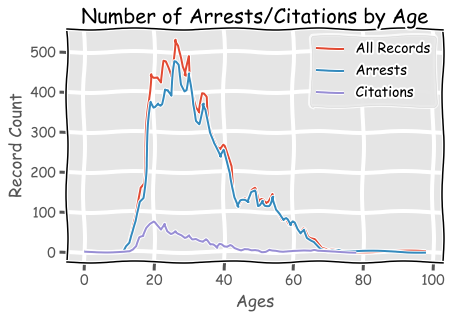

In [21]:
plt.xkcd()

ages_x = df_by_age['AGE']
records_y = df_by_age['rec_cnt']
plt.plot(ages_x, records_y, label='All Records')

ages_arrests_x = df_arrests_by_age['AGE']
records_arrests_y = df_arrests_by_age['rec_cnt']
plt.plot(ages_arrests_x, records_arrests_y, label='Arrests')

ages_citations_x = df_citations_by_age['AGE']
records_citations_y = df_citations_by_age['rec_cnt']
plt.plot(ages_citations_x, records_citations_y, label='Citations')

plt.xlabel("Ages")
plt.ylabel("Record Count")
plt.title("Number of Arrests/Citations by Age")

plt.legend()
plt.grid()
plt.show()